# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [18]:
# you are free to use any package you deem fit
import matplotlib.pyplot as plt
import numpy as np

## Dataset

In [11]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

In [12]:
X.shape

(500, 2)

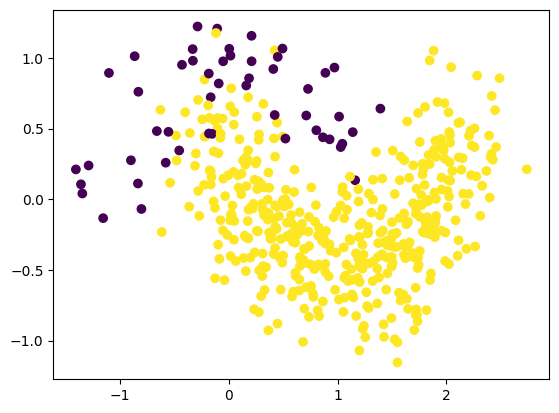

In [16]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=Y)

## Training

In [17]:
# split into sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [23]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

In [24]:
# test out multiple parameters -- we know we want two clusters for the two labels
params = {
    'n_clusters': [2],
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15, 20],
    'max_iter': [250, 300, 350, 400]
}

k_means = KMeans()
clf = GridSearchCV(k_means, params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [250, 300, 350, 400], 'n_clusters': [2],
                         'n_init': [5, 10, 15, 20]})

In [26]:
# we have found the best parameters which appears to be the default kmeans model
clf.best_params_

{'init': 'k-means++', 'max_iter': 250, 'n_clusters': 2, 'n_init': 10}

## Testing / Optimization

In [30]:
# Optimization was mixed in with the training set
# We can analyze the performance on training set here
k_means = clf.best_estimator_

In [31]:
# mean absolute error
np.mean(np.abs(k_means.predict(X_train) - y_train))

0.5942857142857143

## Performance Analysis

In [33]:
# find performance on the test set
np.mean(np.abs(k_means.predict(X_test) - y_test))

0.6066666666666667

The model performed similarly on the test set as the train set which implies no overfitting. Overall the model performs well.